In [2]:
##Darsman Project (Bank_Loan)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Read CSV & Shows Data

In [3]:
df = pd.read_csv('C:/Users/HIGH COMP/Downloads/1/تمرین1/loans.csv')
df.head(5)

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15
1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25
2,46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68
3,46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24
4,46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13


In [4]:
##Show Info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443 entries, 0 to 442
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   client_id    443 non-null    int64  
 1   loan_type    443 non-null    object 
 2   loan_amount  443 non-null    int64  
 3   repaid       443 non-null    int64  
 4   loan_id      443 non-null    int64  
 5   loan_start   443 non-null    object 
 6   loan_end     443 non-null    object 
 7   rate         443 non-null    float64
dtypes: float64(1), int64(4), object(3)
memory usage: 27.8+ KB


In [6]:
##Show describe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
client_id,443.0,38911.060948,7768.681063,25707.00,32885.00,39505.00,46109.00,49624.00
loan_amount,443.0,7982.311512,4172.891992,559.00,4232.50,8320.00,11739.00,14971.00
repaid,443.0,0.534989,0.499338,0.00,0.00,1.00,1.00,1.00
loan_id,443.0,11017.101580,581.826222,10009.00,10507.50,11033.00,11526.00,11991.00
rate,443.0,3.217156,2.397168,0.01,1.22,2.78,4.75,12.62


In [7]:
## Show Shape 
df.shape

(443, 8)

## Eliminating the NAN Columns

In [8]:
## Show Nan 
df.isnull().sum()

client_id      0
loan_type      0
loan_amount    0
repaid         0
loan_id        0
loan_start     0
loan_end       0
rate           0
dtype: int64

In [9]:
## Show Nan(any) بررسی مقادیر گمشده در سطر و ستون
df.isnull().any()
### This Data Has NOT any Lost DATA 

client_id      False
loan_type      False
loan_amount    False
repaid         False
loan_id        False
loan_start     False
loan_end       False
rate           False
dtype: bool

In [10]:
## Show Duplicated Data 
df.duplicated().all
#This DATA Has not any Duplicated DATA 

<bound method NDFrame._add_numeric_operations.<locals>.all of 0      False
1      False
2      False
3      False
4      False
       ...  
438    False
439    False
440    False
441    False
442    False
Length: 443, dtype: bool>

# Feature Engineering

In [11]:
##Estimating the intereste rates in a pperiod of time
df['loan_start'] = pd.to_datetime(df['loan_start'])
df['loan_end'] = pd.to_datetime(df['loan_end'])

#Estimate the difference of starting and finishing the loan
df['loan_duration'] = (df['loan_end'] - df['loan_start']).dt.days
df.head(5)

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,loan_duration
0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,613
1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,635
2,46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,519
3,46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,879
4,46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,684


In [12]:
#Estimating the repayment of loan
rate = df['rate'] * 0.01
df['rate_amount'] = (df['loan_amount'] *rate)
df.head(5)

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,loan_duration,rate_amount
0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,613,293.9480
1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,635,122.4250
2,46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,519,86.5912
3,46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,879,155.2232
4,46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,684,439.7337


In [13]:
#Estimating the amount of value must be paid by customer
df['monthly_payment'] = (df['loan_amount'] + df['rate_amount']) / df['loan_duration'] * 30
df.head(5)

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,loan_duration,rate_amount,monthly_payment
0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,613,293.9480,683.488483
1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,635,122.4250,468.492520
2,46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,519,86.5912,741.074636
3,46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,879,155.2232,432.533215
4,46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,684,439.7337,635.470776


In [14]:
#Estimating the number od days take to repaymet the loan
df['rate_amount_loan_duration'] = df['rate_amount'] / df['loan_duration']
df.head(2)

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,loan_duration,rate_amount,monthly_payment,rate_amount_loan_duration
0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,613,293.948,683.488483,0.479524
1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,635,122.425,468.492520,0.192795


# Statical Anaylsis 

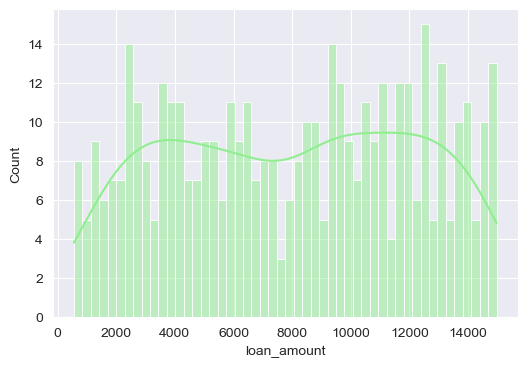

In [4]:
## Show Loan_Amount Column DATA 
plt.figure(figsize=(6, 4))
sns.set_style('darkgrid')
sns.histplot(df['loan_amount'], bins=50, kde=True, color='lightgreen')
plt.show()

In [16]:
## Estimate Skew,Kurt,Mean,Median/ptp(Loan_amount)
skew = df['loan_amount'].skew()
kurt = df['loan_amount'].kurt()
mean = df['loan_amount'].mean()
median = df['loan_amount'].median()
range = np.ptp(df['loan_amount'])

print(f"Skew:{skew:.4f}")
print(f"Kurt:{kurt:.4f}")
print(f"Mean:{mean:.4f}")
print(f"Median:{median:.4f}")
print(f"Range:{range}")

Skew:-0.0401
Kurt:-1.2321
Mean:7982.3115
Median:8320.0000
Range:14412


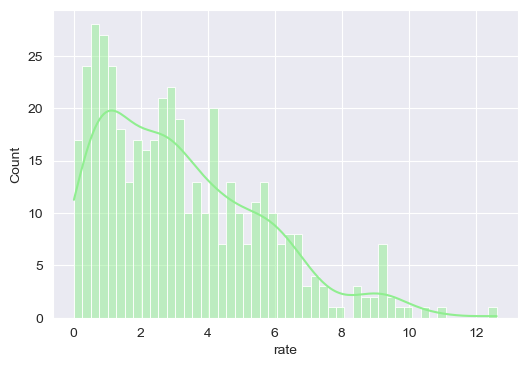

In [17]:
## Show The data of Rate column
plt.figure(figsize=(6,4))
sns.set_style('darkgrid')
sns.histplot(df['rate'],bins=50,kde=True,color='lightgreen')
plt.show()

In [18]:
## Estimate Skew,Kurt,Mean,Median/ptp(Loan_amount)
skew = df['rate'].skew()
kurt = df['rate'].kurt()
mean = df['rate'].mean()
median = df['rate'].median()
range = np.ptp(df['rate'])

print(f"Skew:{skew:.4f}")
print(f"Kurt:{kurt:.4f}")
print(f"Mean:{mean:.4f}")
print(f"Median:{median:.4f}")
print(f"Range:{range}")

Skew:0.8842
Kurt:0.4244
Mean:3.2172
Median:2.7800
Range:12.61


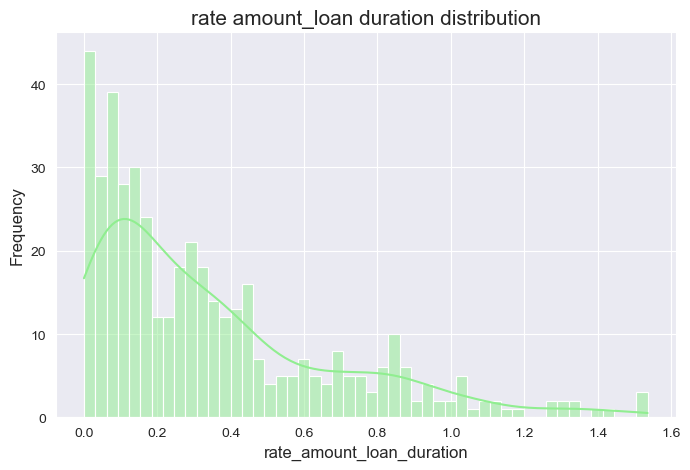

In [19]:
#Show the rate_amount_of_duration column
plt.figure(figsize=(8,5))
sns.set_style('darkgrid')
sns.histplot(df['rate_amount_loan_duration'], bins=50,kde=True,color='lightgreen')
plt.title('rate amount_loan duration distribution',fontsize=15)
plt.xlabel('rate_amount_loan_duration',fontsize=12)
plt.ylabel('Frequency',fontsize=12)
plt.show()

In [20]:
## Estimate Skew,Kurt,Mean,Median/ptp(rate_amount_loan_duration)
skew = df['rate_amount_loan_duration'].skew()
kurt = df['rate_amount_loan_duration'].kurt()
mean = df['rate_amount_loan_duration'].mean()
median = df['rate_amount_loan_duration'].median()
range = np.ptp(df['rate_amount_loan_duration'])

print(f"Skew:{skew:.4f}")
print(f"Kurt:{kurt:.4f}")
print(f"Mean:{mean:.4f}")
print(f"Median:{median:.4f}")
print(f"Range:{range}")

Skew:1.3156
Kurt:1.3020
Mean:0.3445
Median:0.2507
Range:1.5346909624343343


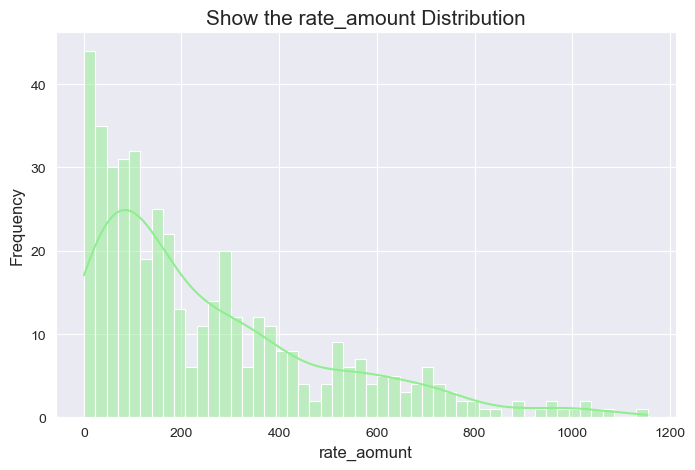

In [21]:
#show rate amount column
plt.figure(figsize=(8,5))
sns.set_style('darkgrid')
sns.histplot(df['rate_amount'],bins=50,kde=True,color='lightgreen')
plt.title('Show the rate_amount Distribution',fontsize=15)
plt.xlabel('rate_aomunt',fontsize=12)
plt.ylabel('Frequency',fontsize=12)
plt.show()

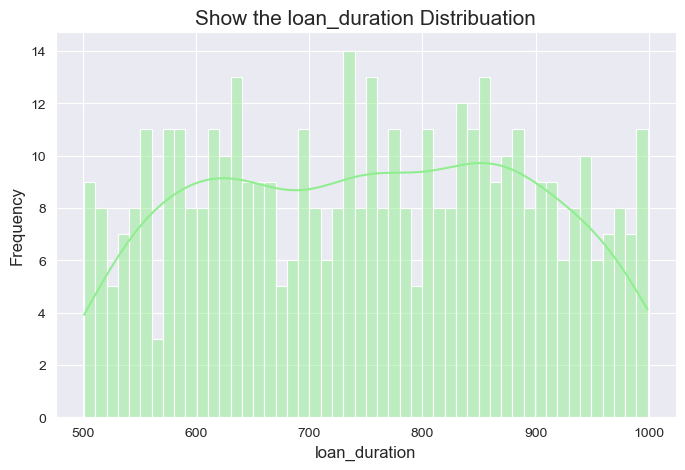

In [22]:
#show long_duration column
plt.figure(figsize=(8,5))
sns.set_style('darkgrid')
sns.histplot(df['loan_duration'],bins=50,kde=True,color='lightgreen')
plt.title('Show the loan_duration Distribuation',fontsize=15)
plt.xlabel('loan_duration',fontsize=12)
plt.ylabel('Frequency',fontsize=12)
plt.show()

In [23]:
## Estimate Skew,Kurt,Mean,Median/ptp(Loan_duration)
skew = df['loan_duration'].skew()
kurt = df['loan_duration'].kurt()
mean = df['loan_duration'].mean()
median = df['loan_duration'].median()
range = np.ptp(df['loan_duration'])

print(f"Skew:{skew:.4f}")
print(f"Kurt:{kurt:.4f}")
print(f"Mean:{mean:.4f}")
print(f"Median:{median:.4f}")
print(f"Range:{range}")

Skew:-0.0189
Kurt:-1.1457
Mean:751.9436
Median:754.0000
Range:498


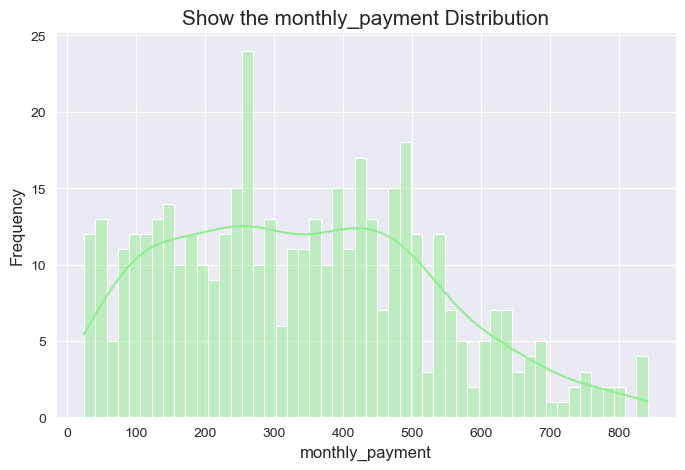

In [24]:
#Show the monthly_payment column
plt.figure(figsize=(8,5))
sns.set_style('darkgrid')
sns.histplot(df['monthly_payment'],bins=50,kde=True,color='lightgreen')
plt.title('Show the monthly_payment Distribution',fontsize=15)
plt.xlabel('monthly_payment',fontsize=12)
plt.ylabel('Frequency',fontsize=12)
plt.show()

In [25]:
## Estimate Skew,Kurt,Mean,Median/ptp(Monthly_payment)
skew = df['monthly_payment'].skew()
kurt = df['monthly_payment'].kurt()
mean = df['monthly_payment'].mean()
median = df['monthly_payment'].median()
range = np.ptp(df['monthly_payment'])

print(f"Skew:{skew:.4f}")
print(f"Kurt:{kurt:.4f}")
print(f"Mean:{mean:.4f}")
print(f"Median:{median:.4f}")
print(f"Range:{range}")

Skew:0.3529
Kurt:-0.5574
Mean:340.0206
Median:329.0406
Range:816.6754785499755


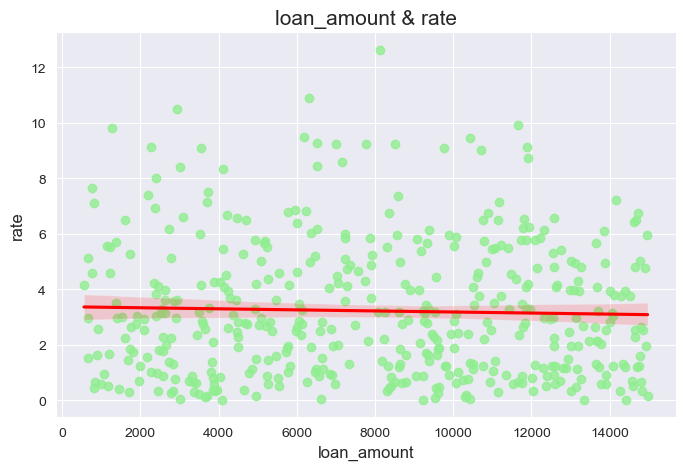

In [26]:
#Regression Plot of loan_amount and rate
plt.figure(figsize=(8,5))
sns.set_style('darkgrid')
sns.regplot(x='loan_amount',y='rate',data=df,color='lightgreen',line_kws={'color':'red'})
plt.title('loan_amount & rate',fontsize=15)
plt.xlabel('loan_amount',fontsize=12)
plt.ylabel('rate',fontsize=12)
plt.show()

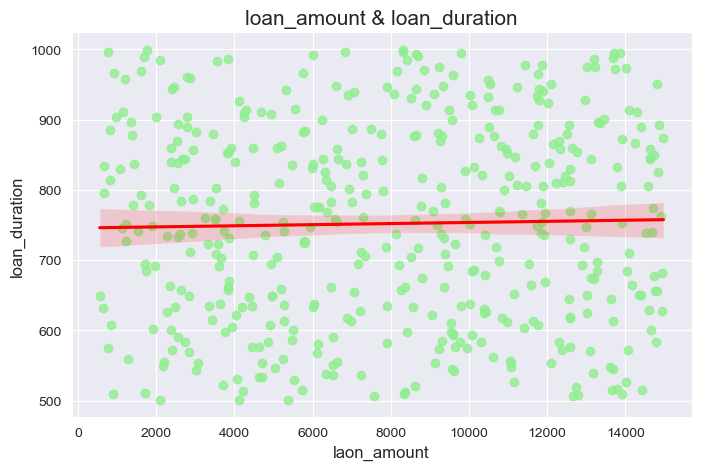

In [27]:
#Regression plot of loan+amount & loan_duration
plt.figure(figsize=(8,5))
sns.set_style('darkgrid')
sns.regplot(x='loan_amount',y='loan_duration',data=df,color='lightgreen',line_kws={'color':'red'})
plt.title('loan_amount & loan_duration',fontsize=15)
plt.xlabel('laon_amount',fontsize=12)
plt.ylabel('loan_duration',fontsize=12)
plt.show()

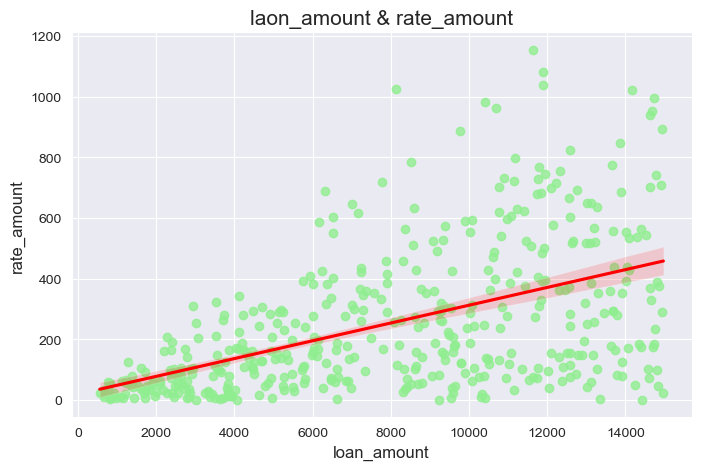

In [28]:
#Regression plot of loan_amount & rate_amount
plt.figure(figsize=(8,5))
sns.set_style('darkgrid')
sns.regplot(x='loan_amount',y='rate_amount',data=df,color='lightgreen',line_kws={'color':'red'})
plt.title('laon_amount & rate_amount',fontsize=15)
plt.xlabel('loan_amount',fontsize=12)
plt.ylabel('rate_amount',fontsize=12)
plt.show()

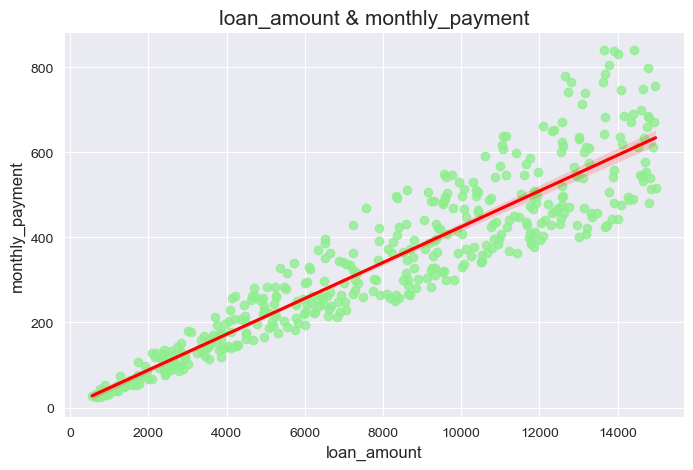

In [29]:
#Regression plot of loan_amount & monthly_payment
plt.figure(figsize=(8,5))
sns.set_style('darkgrid')
sns.regplot(x='loan_amount',y='monthly_payment',data=df,color='lightgreen',line_kws={'color':'red'})
plt.title('loan_amount & monthly_payment',fontsize=15)
plt.xlabel('loan_amount',fontsize=12)
plt.ylabel('monthly_payment',fontsize=12)
plt.show()

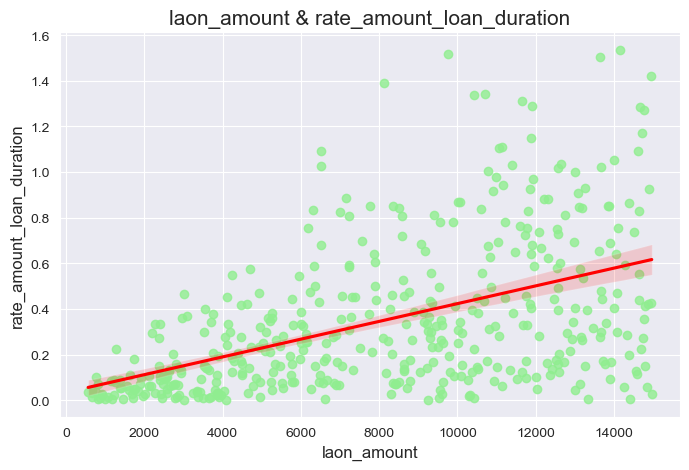

In [30]:
#Regression plot of loan_amount & rate_amount_loan_duration
plt.figure(figsize=(8,5))
sns.set_style('darkgrid')
sns.regplot(data=df,x='loan_amount',y='rate_amount_loan_duration',color='lightgreen',line_kws={'color':'red'})
plt.title('laon_amount & rate_amount_loan_duration',fontsize=15)
plt.xlabel('laon_amount',fontsize=12)
plt.ylabel('rate_amount_loan_duration',fontsize=12)
plt.show()

<Figure size 500x800 with 0 Axes>

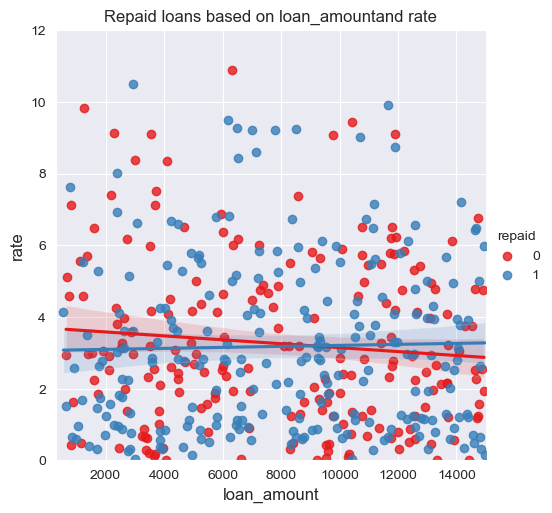

In [31]:
#repaid laons based on loan_amount and rate
plt.figure(figsize=(5,8))
sns.set_style('darkgrid')
graph = sns.lmplot(x='loan_amount',y='rate',hue='repaid',data=df,palette='Set1')
graph.set(xlim=(300,15000))
graph.set(ylim=(0,12))
plt.title('Repaid loans based on loan_amountand rate',fontsize=12)
plt.xlabel('loan_amount',fontsize=12)
plt.ylabel('rate',fontsize=12)
plt.show()

In [ ]:
#ON THE BASE OF ABOVE REGRESSION MONTHLY_PAYMENT , RATE_AMOUNT AND RATE_AMOUNT_DURATION HAS GOR CORRELATION

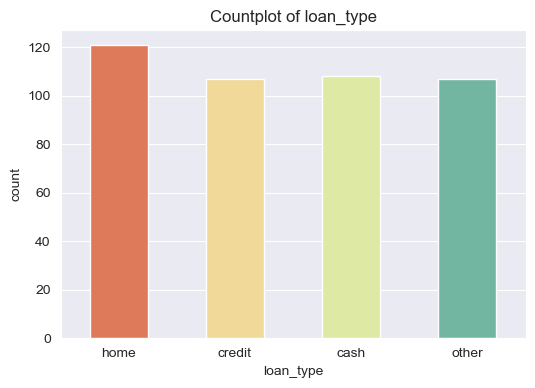

In [32]:
##Estimate the DATA in Loan_Type Column
plt.figure(figsize = (6,4))
sns.set_style('darkgrid')
sns.countplot(data=df, x='loan_type',palette = 'Spectral',width = 0.5)
plt.title("Countplot of loan_type")
plt.show()

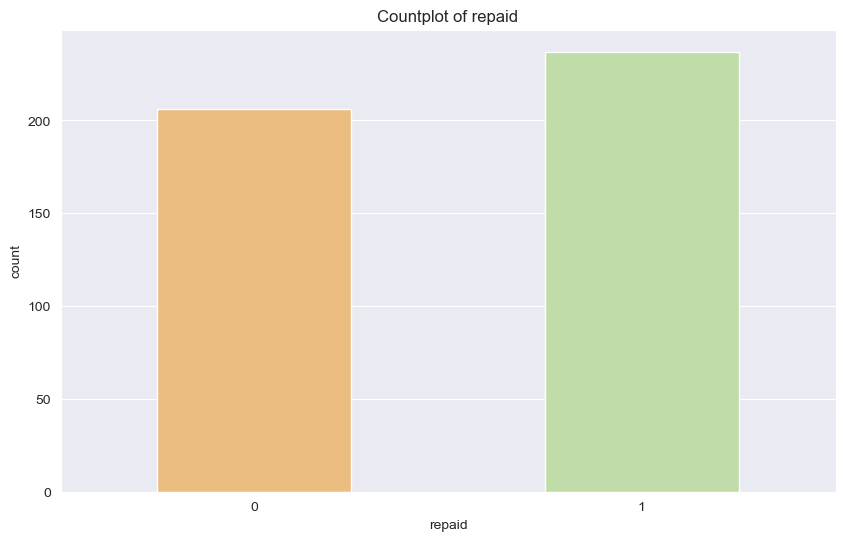

In [33]:
##Estimate the DATA in Repain Column
plt.figure(figsize = (10,6))
sns.set_style('darkgrid')
sns.countplot(data = df, x='repaid',palette = 'Spectral',width=0.5)
plt.title("Countplot of repaid")
plt.show()

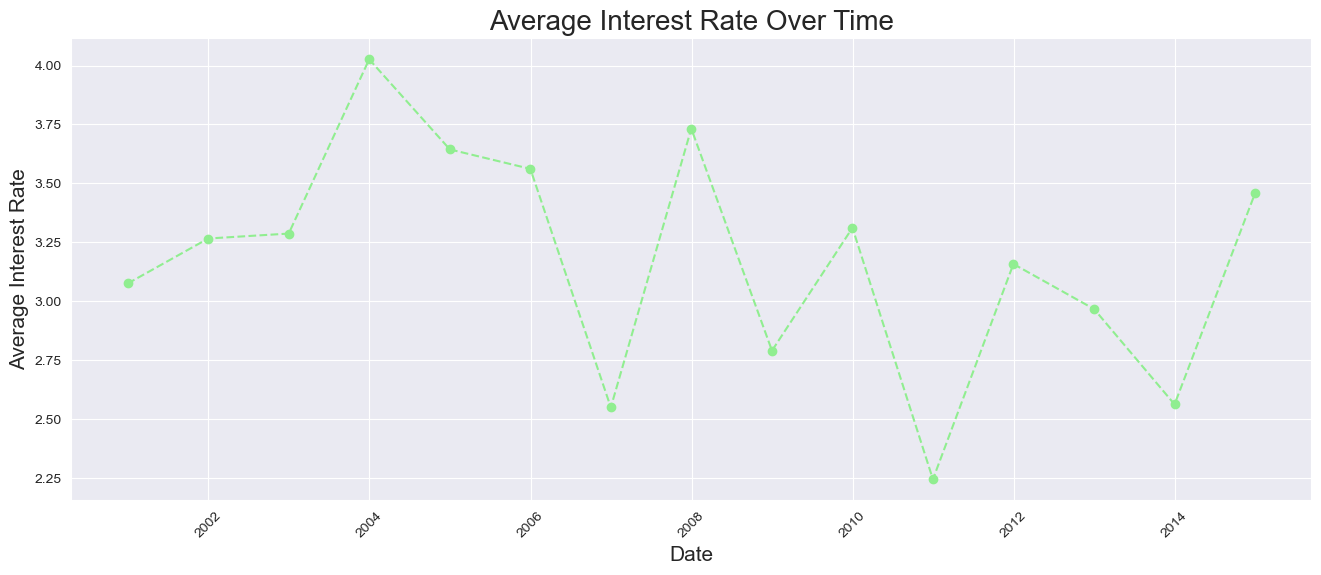

In [34]:
##Estimating the mean of Interest rates in a period of time
interest_rates = df.groupby(pd.Grouper(key = 'loan_start', freq='Y'))['rate'].mean()
plt.figure(figsize=(16,6))
sns.set_style('darkgrid')
plt.plot(interest_rates.index,interest_rates.values,marker='o',linestyle='--',color='lightgreen')
plt.title("Average Interest Rate Over Time",fontsize=20)
plt.xlabel('Date',fontsize=15)
plt.ylabel('Average Interest Rate',fontsize=15)
plt.xticks(rotation = 45)
plt.show()

# Number of Loan Per Month

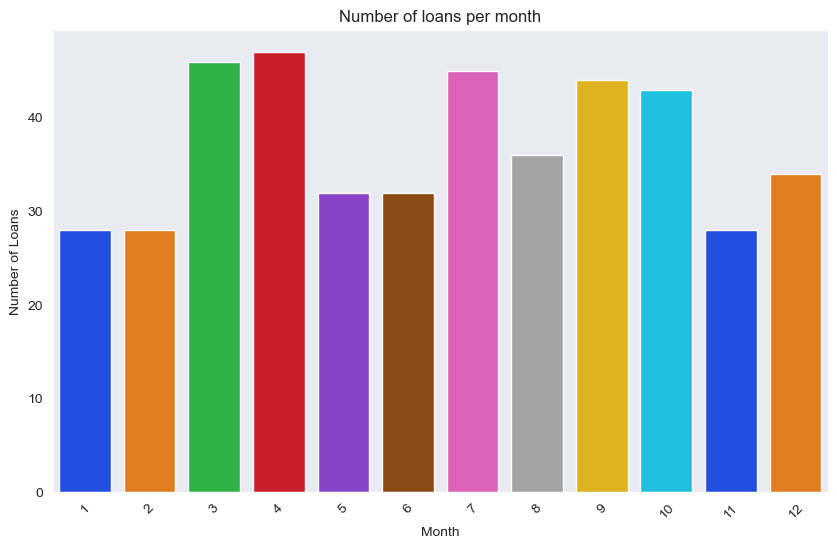

In [35]:
##Making a new column to extimate the month of Loan
df['start_month'] = df['loan_start'].dt.month
##Estimating the number of loan for each month
loan_count_per_month = df['start_month'].value_counts().sort_index()

plt.figure(figsize=(10,6))
sns.set_style = ('darkgrid')
sns.barplot(x=loan_count_per_month.index,y=loan_count_per_month.values,palette='bright')
plt.title('Number of loans per month')
plt.xlabel('Month')
plt.ylabel('Number of Loans')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [36]:
##Show the number of loans and the sum , mean of loans for each client
df.groupby('client_id')[['loan_amount']].agg(['size','sum','mean'])
df

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,loan_duration,rate_amount,monthly_payment,rate_amount_loan_duration,start_month
0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,613,293.9480,683.488483,0.479524,4
1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,635,122.4250,468.492520,0.192795,10
2,46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,519,86.5912,741.074636,0.166842,2
3,46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,879,155.2232,432.533215,0.176591,12
4,46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,684,439.7337,635.470776,0.642886,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
438,26945,other,12963,0,10330,2001-11-26,2004-06-11,2.46,928,318.8898,429.371438,0.343631,11
439,26945,credit,1728,1,10248,2004-01-27,2005-06-21,5.27,511,91.0656,106.794458,0.178211,1
440,26945,other,9329,0,10154,2001-12-17,2004-07-22,5.65,948,527.0885,311.901535,0.556001,12
441,26945,home,4197,0,10333,2003-10-16,2005-07-10,4.50,633,188.8650,207.860900,0.298365,10


In [37]:
df.groupby(['loan_type','repaid'])[['rate']].agg(['mean','median','count'])
df

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,loan_duration,rate_amount,monthly_payment,rate_amount_loan_duration,start_month
0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,613,293.9480,683.488483,0.479524,4
1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,635,122.4250,468.492520,0.192795,10
2,46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,519,86.5912,741.074636,0.166842,2
3,46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,879,155.2232,432.533215,0.176591,12
4,46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,684,439.7337,635.470776,0.642886,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
438,26945,other,12963,0,10330,2001-11-26,2004-06-11,2.46,928,318.8898,429.371438,0.343631,11
439,26945,credit,1728,1,10248,2004-01-27,2005-06-21,5.27,511,91.0656,106.794458,0.178211,1
440,26945,other,9329,0,10154,2001-12-17,2004-07-22,5.65,948,527.0885,311.901535,0.556001,12
441,26945,home,4197,0,10333,2003-10-16,2005-07-10,4.50,633,188.8650,207.860900,0.298365,10


In [38]:
##Show the reimbursement of LOAN TYPE
df.pivot_table(index = 'loan_type',columns = 'repaid',values='loan_amount',aggfunc='mean')

repaid,0,1
loan_type,,
cash,7235.400000,8841.620690
credit,7859.086957,7104.819672
home,7937.353846,8092.910714
other,8747.155556,8127.661290


# Detecting the Outliers

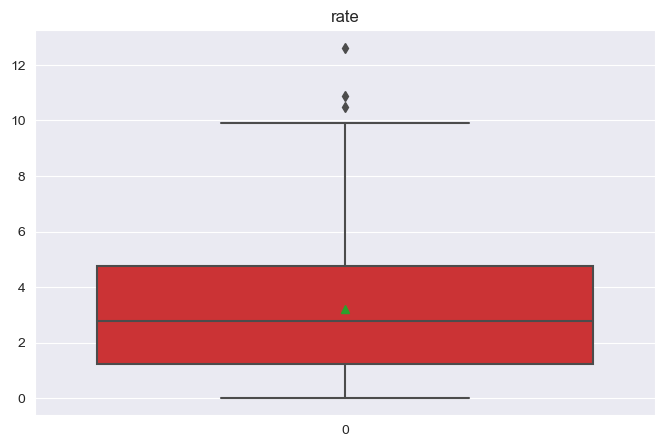

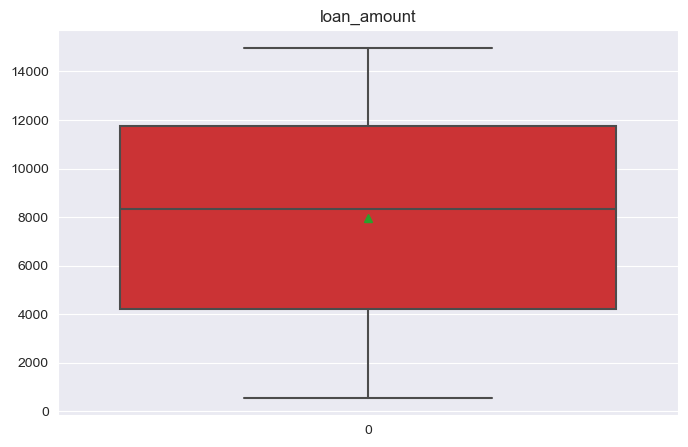

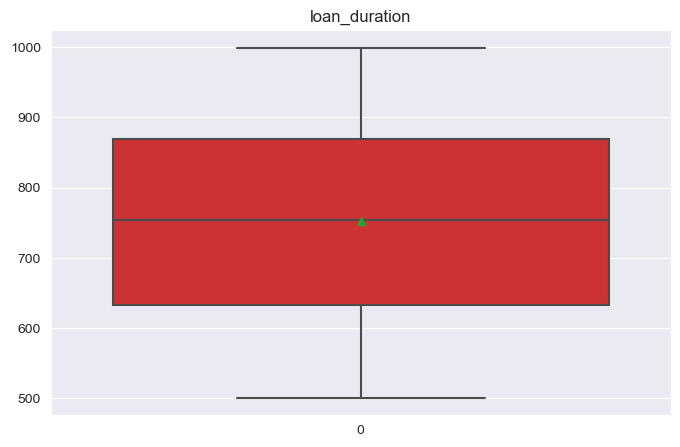

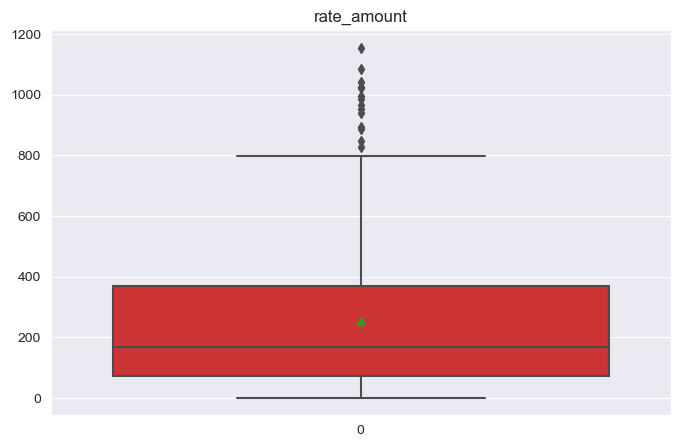

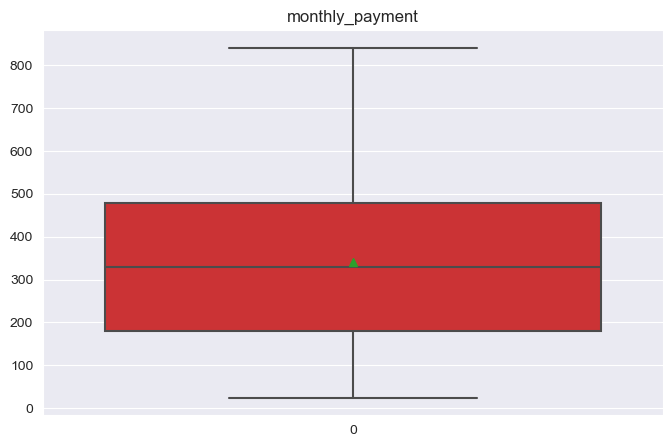

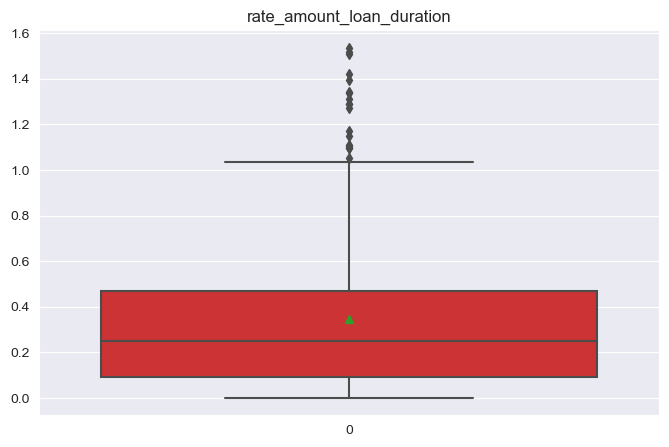

In [39]:
numerioc_col = ['rate','loan_amount','loan_duration','rate_amount','monthly_payment','rate_amount_loan_duration']
for col in numerioc_col:
    plt.figure(figsize=(8,5))
    sns.boxplot(df[col],showmeans=True,palette='Set1')
    plt.title(f"{col}")
    plt.show()

In [ ]:
#ON THE BASE OF ABOVE SATATISTICS , RATE , REPAID_AMOUNT ,RATE_AMOUNT_LOAN_DURATION 

In [40]:
#Function for eliminating the IQR data
def remove_outliers(df,column_name):
    Q1 = np.quantile(df[column_name],0.25)
    Q3 = np.quantile(df[column_name],0.75)
    IQR = Q3 - Q1 
    lower_bound = Q1 - 1.5 * IQR
    higher_bound = Q3 + 1.5 * IQR
    df = df[(df[column_name] >= lower_bound) & (df[column_name] <= higher_bound)]
    return df


In [41]:
numeric_col = ['rate','loan_amount','loan_duration','monthly_payment','rate_amount_loan_duration']
for col in numeric_col:
    df = remove_outliers(df,col)

In [42]:
df.reset_index(inplace=True,drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421 entries, 0 to 420
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   client_id                  421 non-null    int64         
 1   loan_type                  421 non-null    object        
 2   loan_amount                421 non-null    int64         
 3   repaid                     421 non-null    int64         
 4   loan_id                    421 non-null    int64         
 5   loan_start                 421 non-null    datetime64[ns]
 6   loan_end                   421 non-null    datetime64[ns]
 7   rate                       421 non-null    float64       
 8   loan_duration              421 non-null    int64         
 9   rate_amount                421 non-null    float64       
 10  monthly_payment            421 non-null    float64       
 11  rate_amount_loan_duration  421 non-null    float64       
 12  start_mo

In [43]:
#Estimating the amount of data in loan_type column
df['loan_type'].value_counts()

home      113
cash      104
other     103
credit    101
Name: loan_type, dtype: int64

In [44]:
#Adjusting codes in loan_type
df = pd.get_dummies(df,columns=['loan_type'],dtype='int')
df.sample(5)

,client_id,loan_amount,repaid,loan_id,loan_start,loan_end,rate,loan_duration,rate_amount,monthly_payment,rate_amount_loan_duration,start_month,loan_type_cash,loan_type_credit,loan_type_home,loan_type_other
68,46180,1607,0,11112,2003-02-28,2005-05-01,2.23,793,35.8361,62.150168,0.045191,2,0,0,1,0
393,49624,2572,1,10578,2004-05-04,2005-12-16,2.28,591,58.6416,133.535107,0.099224,5,0,0,0,1
282,49068,12085,1,11174,2012-03-11,2014-10-17,5.78,950,698.5130,403.689884,0.735277,3,0,1,0,0
136,35089,3703,0,11939,2005-07-23,2007-09-03,7.13,772,264.0239,154.158960,0.342000,7,1,0,0,0
348,38537,3418,0,11991,2005-02-02,2006-10-10,0.63,615,21.5334,167.782117,0.035014,2,1,0,0,0


In [45]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
for col in df.columns:
    df[col] = scaler.fit_transform(df[[col]])

df.head()

,client_id,loan_amount,repaid,loan_id,loan_start,loan_end,rate,loan_duration,rate_amount,monthly_payment,rate_amount_loan_duration,start_month,loan_type_cash,loan_type_credit,loan_type_home,loan_type_other
0,0.931534,1.419465,-1.056209,-1.324778,-1.228052,-1.312440,-0.386440,-1.013078,0.351431,1.920998,0.682717,-0.786449,-0.572779,-0.561805,1.650958,-0.569122
1,0.931534,0.481914,-1.056209,-0.050460,-0.880591,-0.952459,-0.801892,-0.855978,-0.507439,0.756286,-0.408315,1.032754,-0.572779,1.779977,-0.605709,-0.569122
2,0.931534,1.192693,0.946782,-0.040142,-0.356572,-0.502953,-1.065012,-1.684325,-0.686870,2.232963,-0.507068,-1.392850,-0.572779,-0.561805,1.650958,-0.569122
3,0.931534,1.140473,0.946782,-0.717715,0.756182,0.831167,-0.806508,0.886407,-0.343208,0.561481,-0.469975,1.639155,1.745874,-0.561805,-0.605709,-0.569122
4,0.931534,1.510609,0.946782,0.690742,0.659421,0.612674,0.065942,-0.506073,1.081427,1.660868,1.304326,0.123153,-0.572779,1.779977,-0.605709,-0.569122


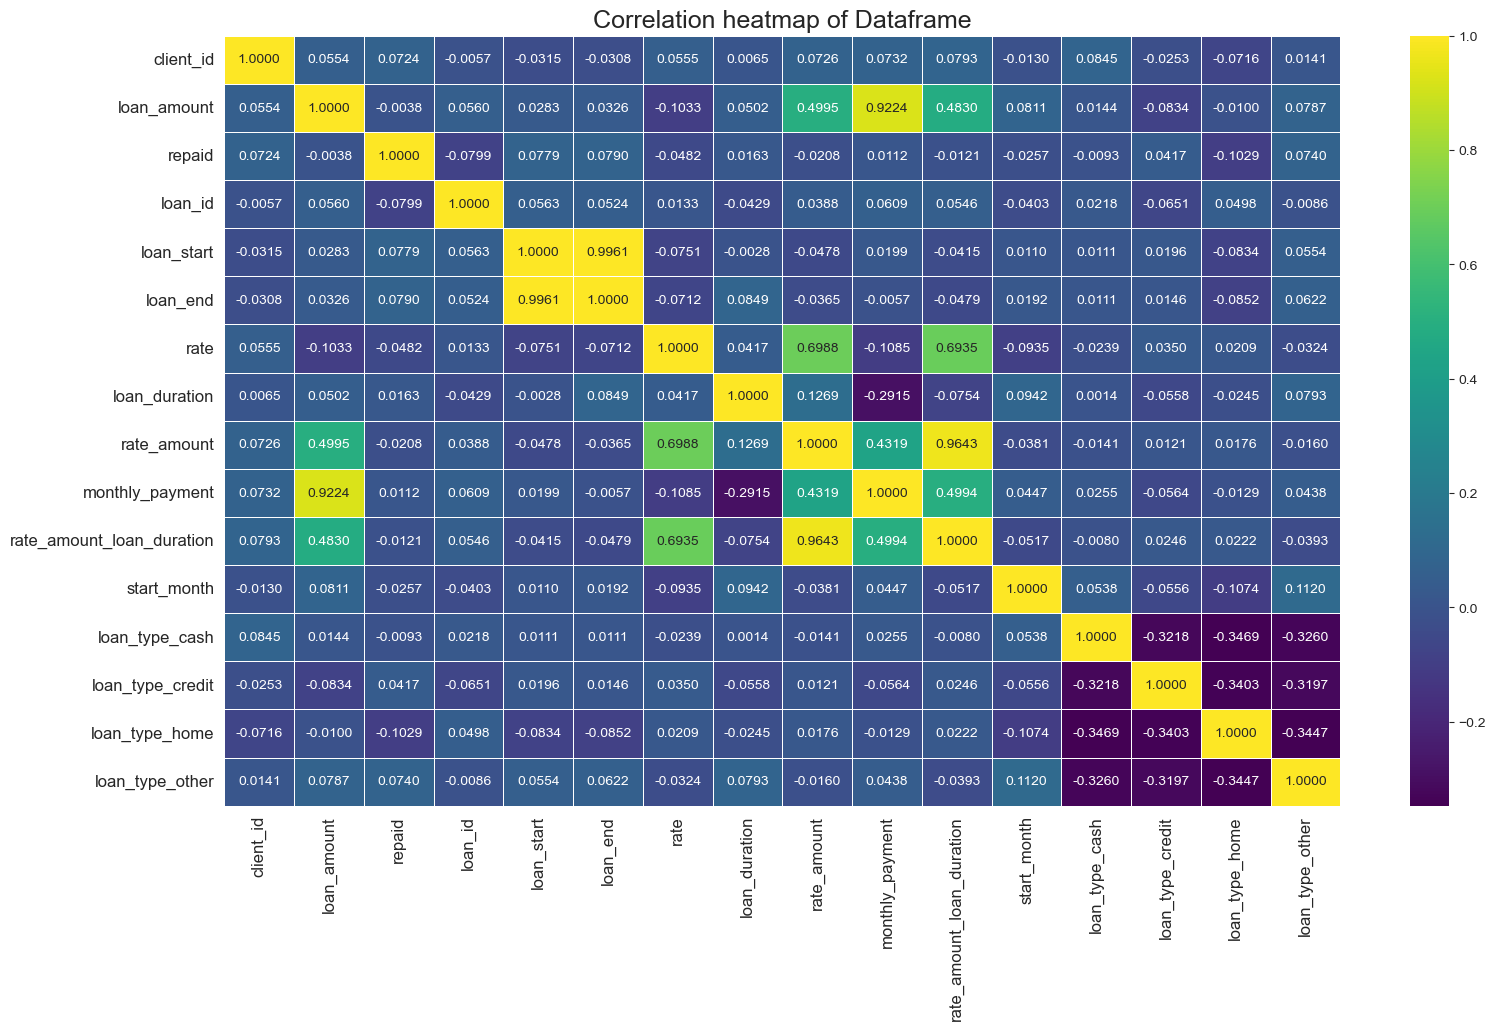

In [46]:
#correlation heatmap
plt.figure(figsize=(18,10))
sns.heatmap(df.corr(numeric_only=True),annot=True,linewidth=0.5,fmt='.4f',cmap='viridis')
plt.title('Correlation heatmap of Dataframe',fontsize=18)
plt.xticks(rotation=90,fontsize=12)
plt.yticks(rotation=0,fontsize=12)
plt.show()

# The Second Section

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.metrics import mean_squared_error ,r2_score
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

In [48]:
#Put the the feathures for Machin learning in new DataFrame
df_model = df[['loan_amount','repaid','rate','loan_duration','rate_amount','monthly_payment','rate_amount_loan_duration']]
df_model.head(2)

,loan_amount,repaid,rate,loan_duration,rate_amount,monthly_payment,rate_amount_loan_duration
0,1.419465,-1.056209,-0.386440,-1.013078,0.351431,1.920998,0.682717
1,0.481914,-1.056209,-0.801892,-0.855978,-0.507439,0.756286,-0.408315


In [51]:
#Seperate feathures in New Chart
X = df_model[['monthly_payment']]
y = df_model['loan_amount']

#20 Percent is ready for test
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)

#Create a model Object of LinearRegression class
model = LinearRegression()

# #Training a model
model.fit(X_train,y_train)

#Make a new prediciton on the base of test dataset
y_pred = model.predict(X_test)

#Check mse , r2 and score of model
r2 = r2_score(y_test,y_pred)
score = model.score(X,y)
mse = mean_squared_error(y_pred,y_test)

print(f"SLR MSE:{mse}")
print(f"SLR R_squared:{r2}")
print(f"SLR Score:{score}")

SLR MSE:0.13893504917787725
SLR R_squared:0.8582989728959065
SLR Score:0.8509094330791893


# MLR 

In [55]:
features = ['monthly_payment','rate_amount','rate_amount_loan','rate_amount_loan_duration']

#train and test sets
X_train,X_test , y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

#Linear Regression Model Object
mlr_model = LinearRegression()

#Train mlr_model
mlr_model.fit(X_train,y_train)

#prediction
y_pred = mlr_model.predict(X_test)

#Estimating mse , r2 and score

r2 = r2_score(y_test,y_pred)
mse = mean_squared_error(y_pred,y_test)
score = mlr_model.score(X,y)

#Show results
print(f"R_squred : {r2}")
print(f"MSE : {mse}")
print(f"Score : {score}")


R_squred : 0.8582989728959065
MSE : 0.13893504917787725
Score : 0.8509094330791893
